In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
linked = linkage(X_scaled, method="ward")

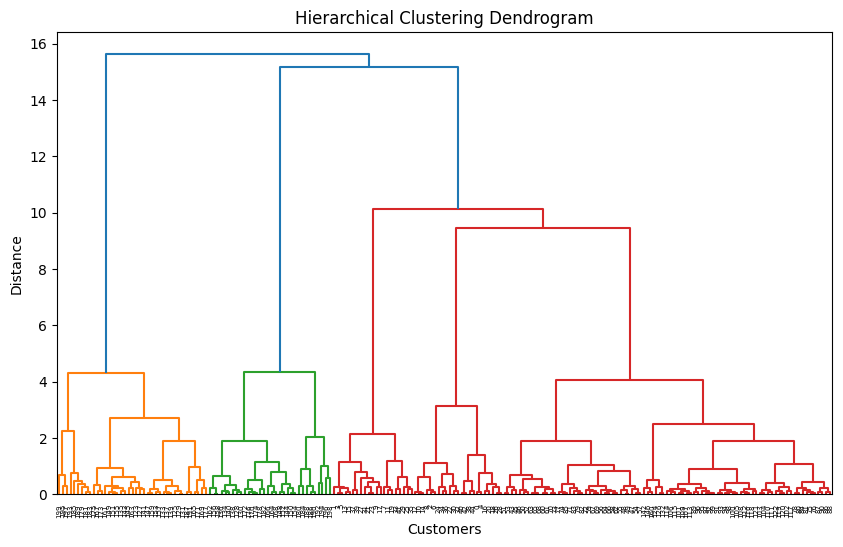

In [15]:
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [19]:
num_clusters = 5 
clusters = fcluster(linked, num_clusters, criterion="maxclust")
df["Cluster"] = clusters
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


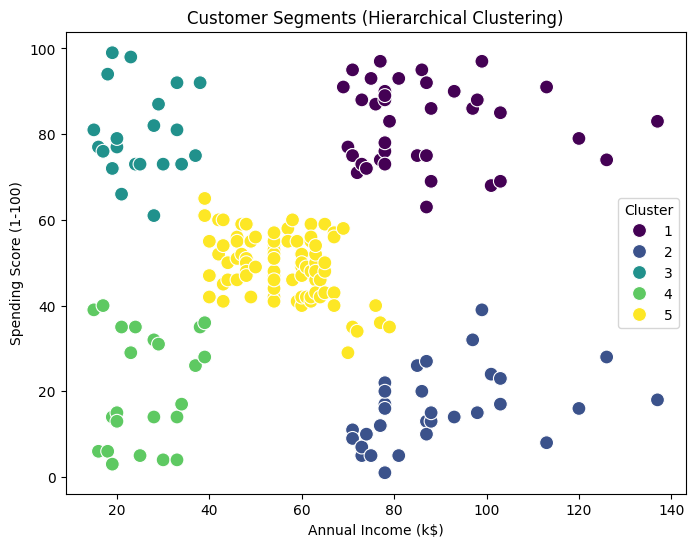

Clusters were determined using the hierarchical clustering dendrogram. The optimal number of clusters (e.g., 5) was chosen based on the dendrogram cut-off level. The scatter plot visualizes different customer groups based on spending behavior and income.


In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Customer Segments (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

print("Clusters were determined using the hierarchical clustering dendrogram. The optimal number of clusters (e.g., 5) was chosen based on the dendrogram cut-off level. The scatter plot visualizes different customer groups based on spending behavior and income.")